# <u>***EDA and engineering of Quality***<u>

---
---

### ***1. EDA -- What makes a review a good review?***

#### <u>used dataset: review_1918.csv<u>

---
---

#### ***1.1 Import necessary modules***

In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

import nltk
from nltk.corpus import stopwords

# -------------------------------- 

import spacy
import contextualSpellCheck
import en_core_web_sm
from spacy.lang.en.examples import sentences

!ln -s /Users/felixbecker/neuefische/Yelp-Capstone/modeling/Language.py Language.py
from Language import language_processing

from wordcloud import WordCloud

import unicodedata

ln: Language.py: File exists


---

#### ***1.2 Set global parameters***

In [25]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['figure.dpi'] = 150

---

#### ***1.3 Import dataset***

In [3]:
df_rev = pd.read_csv('../data/yelp_dataset/review_1819.csv')

---

#### ***1.4 Overview of the dataset***

In [4]:
df_rev.shape

(1813646, 11)

In [5]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813646 entries, 0 to 1813645
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
 10  year         int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 152.2+ MB


In [6]:
df_rev.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
704424,2726896,-pknjOd5kEWw-w5aU-Bjhg,A4WMwbeMsE8NZ8DJfOMONg,q7Ofe_Oeh5gnSqynB906_g,5.0,2,0,1,Can't believe I haven't left a review of this ...,2019-02-11 17:07:04,2019
864051,3324111,bXOl-2GOQ2kTWvV4ujH2Rw,RCFkgRl54yHMXLtS80-DbQ,6fYIlInL937IBuHmocfiBA,4.0,3,2,2,I bike by the Silk Road all the time and have ...,2019-12-10 11:58:39,2019
914446,3569440,DK-DCYupce6GgAG2OI9wdA,f9BBoKS50w0S_2Y7AtjxKQ,QBcYoqQ8NfZw8lBtHiK4ew,1.0,0,0,0,My 80 year old mother boarded her small dog wi...,2018-01-01 20:33:41,2018
376437,1482451,XTzs4oFVGAmqVHZmi-7WGw,-HQtNQOAJtjeqWeaM4lIEA,kBix8suuT2mbFnmVaiAD2Q,1.0,1,0,0,I didn't have too high of expectations for thi...,2018-04-29 06:52:37,2018
771924,3146466,GTNGy58gZAScw9H_CgrbBg,p_3WNbc2FgMK0GFRccccvg,PmJx4zNYCyR7Hx9AmgUUJA,2.0,0,0,0,The steak was incredibly tough and the flavor ...,2019-01-02 17:42:08,2019
43817,301650,PMD6meNPwtfzKDZmOShpaQ,JBzzdAyH0xIdSVvSPk_t_Q,cMf3Ej3KNBoN2sIpLCm9Rg,3.0,0,0,0,I really like Zoe's Kitchen and have tried ma...,2018-10-05 01:30:46,2018
1153901,4547171,E5fQ-bNSkC_JWct6P7XQ2w,XL4R_4U56dmdJAswicGerg,qJqTXdv2ukMDUYGb-oAG-w,1.0,0,0,0,I have tried the $1 breakfast burrito two diff...,2019-05-14 16:37:51,2019
597553,2427276,Uh7ky3g2lQZV4PdWbZgJCA,g6-2BUyy8VwlIrvTX7GB1g,KBkMAAH3KGzUVh5hZVxvrg,5.0,0,0,0,Awesome experience and fast fix.\n\nHad an iss...,2019-04-16 15:11:08,2019
747503,2967702,4uaI_ghj01AIaLjuNsvTgg,o63pcZY7RNIOmpK9xzX42w,R8t9g5nvi7VFyS8zsgmj8Q,5.0,1,0,0,Had trashed wings and burnt ends toasted Ravi ...,2018-05-24 01:04:26,2018
1379789,5343398,oe7CU7fS0azBQr6YBaZFFw,qkP0jRVS6CxHWyca-H16VA,9_V0SWbQPnZ0mR3kljXqBQ,5.0,1,1,1,This place is SO good! They have a crazy amoun...,2019-06-09 02:02:13,2019


In [7]:
df_rev.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

---

#### ***1.5 Cleaning the dataset***

In [8]:
# Dropping 'Unnamed: 0', 'date', 'year'

df_rev.drop(['Unnamed: 0', 'date', 'year'], axis=1, inplace=True)

---

#### ***1.6 Gain information on rating***

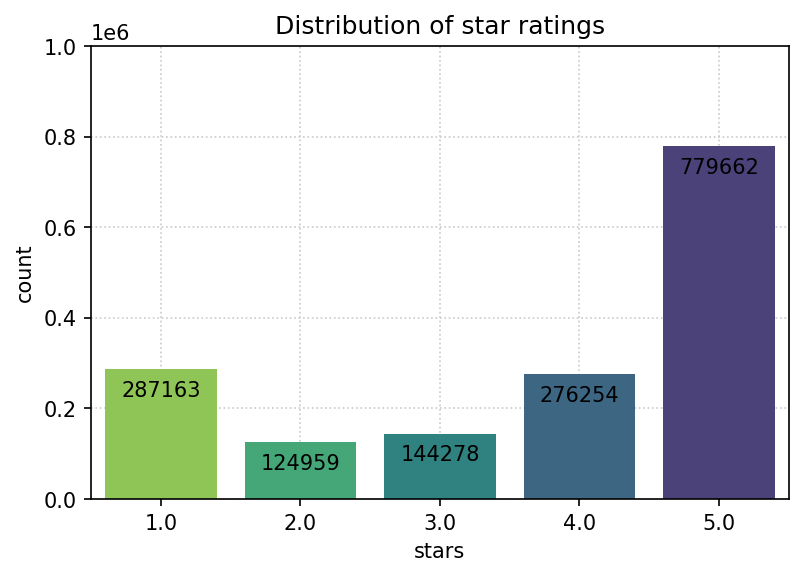

In [144]:
ax = sns.countplot(data=df_rev, x='stars', palette='viridis_r', zorder=2)
plt.title('Distribution of star ratings')
plt.ylim(0, 1000000)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

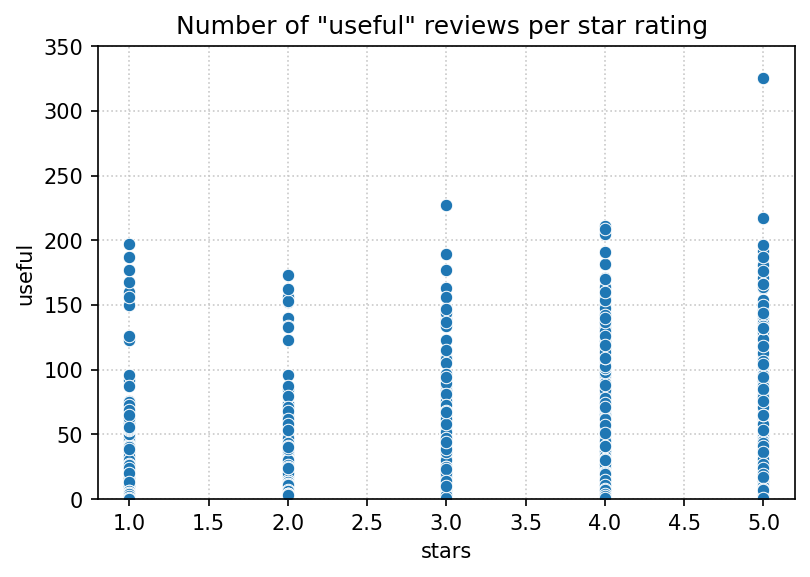

In [27]:
sns.scatterplot(data=df_rev, x='stars', y='useful', zorder=2)
plt.title('Number of "useful" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

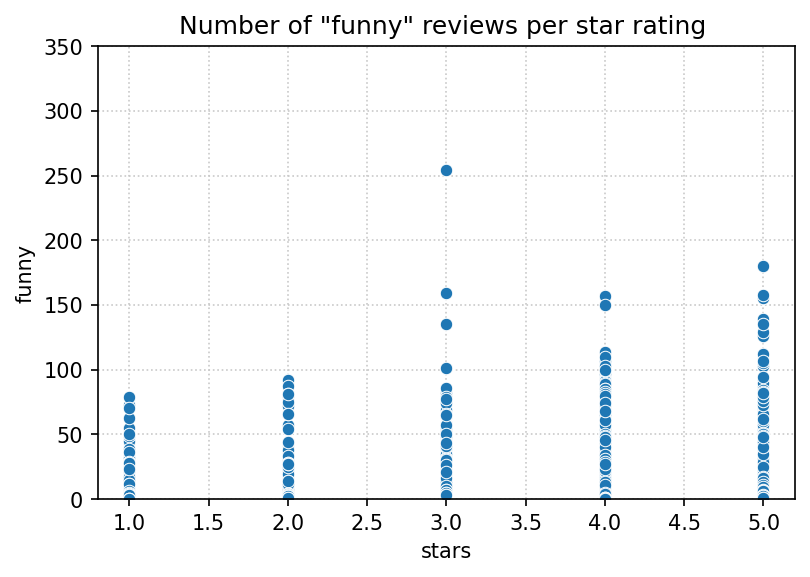

In [28]:
sns.scatterplot(data=df_rev, x='stars', y='funny', zorder=2)
plt.title('Number of "funny" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

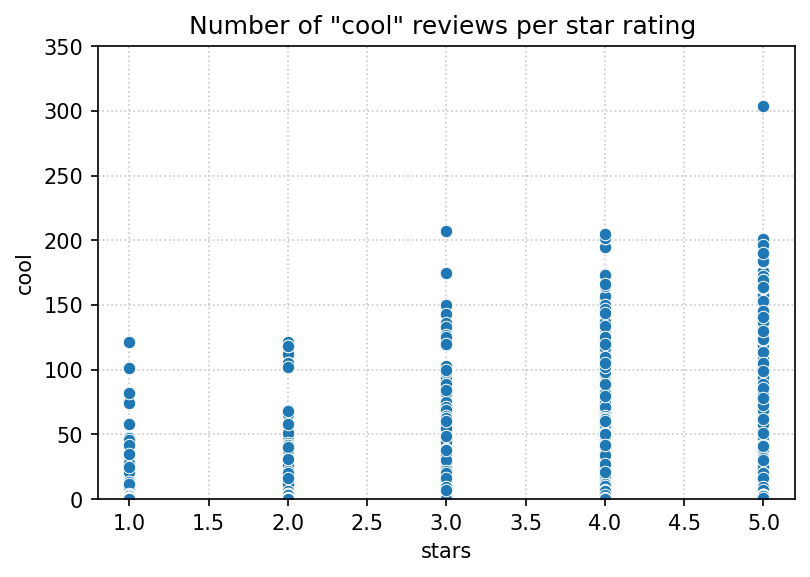

In [29]:
sns.scatterplot(data=df_rev, x='stars', y='cool', zorder=2)
plt.title('Number of "cool" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

In [30]:
df_corr = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

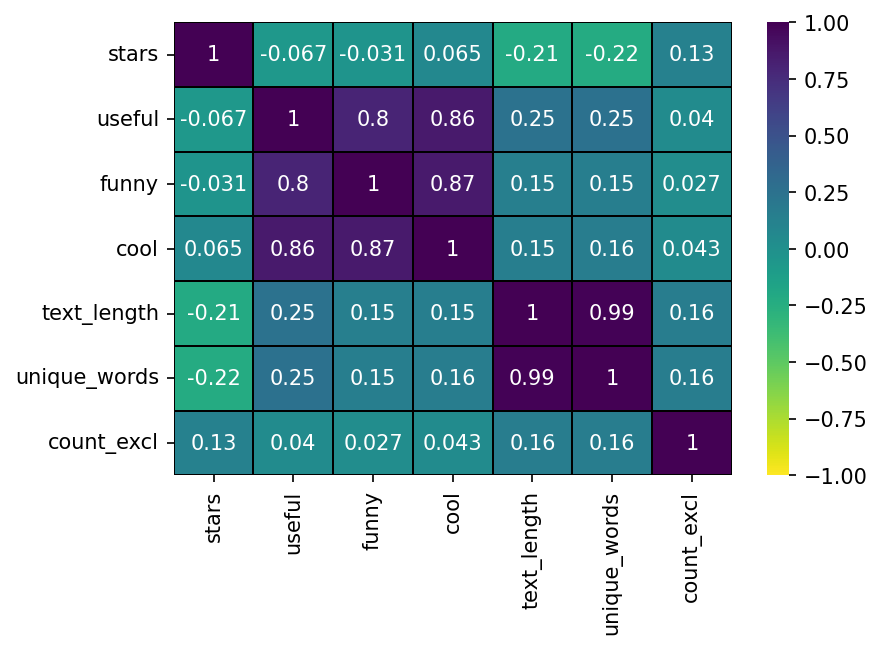

In [31]:
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

***Without considering the actual review message there is no useable correlation between star rating and no. of usefulness of the reviews***

---

#### ***1.7 Gain information on texts***

In [32]:
# Get the length(including punctuation and spaces) of each review and save it to new column

df_rev['text_length'] = df_rev['text'].str.len()

# Get the number of unique words per review and save it to new column

df_rev['unique_words'] = df_rev['text'].apply(lambda x : len(set(str(x).split())))

# Get the number of english stopwords -- Takes pretty long to evaluate

# df_rev['stopwords'] = df_rev['text'].apply(lambda x : len([i for i in str(x).lower().split() if i in set(stopwords.words('english'))]))

In [33]:
# Get the number of used exclamation marks per review

df_rev['count_excl'] = df_rev['text'].str.count('!')

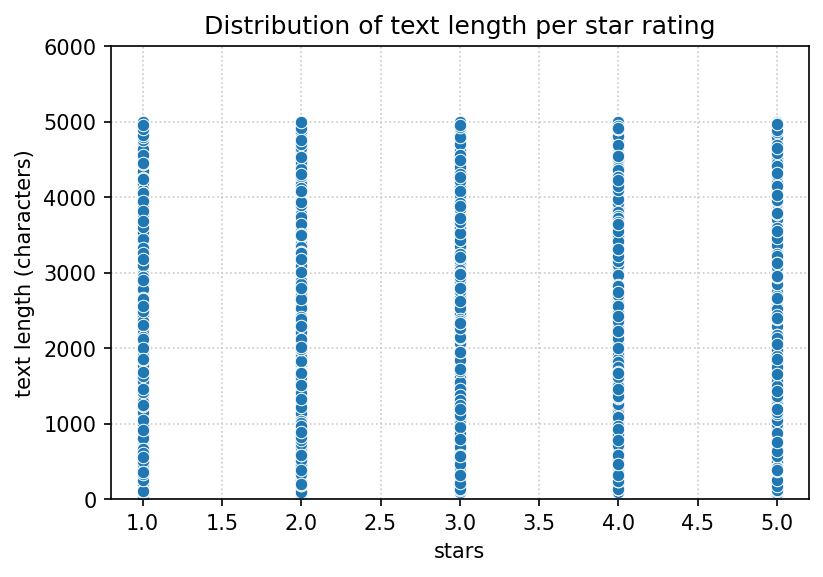

In [34]:
sns.scatterplot(data=df_rev, x='stars', y='text_length', zorder=2)
plt.title('Distribution of text length per star rating')
plt.ylim(0, 6000)
plt.ylabel('text length (characters)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

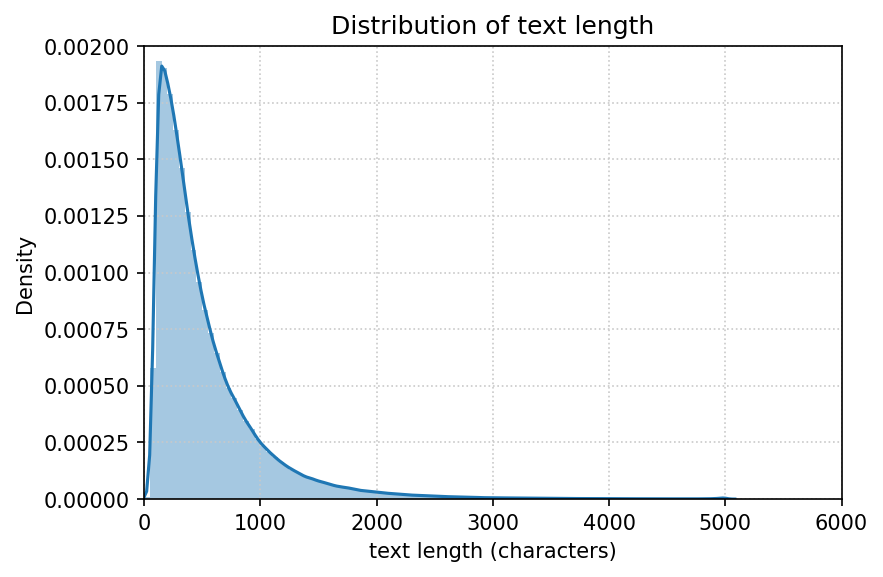

In [35]:
sns.distplot(df_rev['text_length'], bins=100)
plt.title('Distribution of text length')
plt.xlim(0, 6000)
plt.ylim(0, 0.002)
plt.xlabel('text length (characters)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

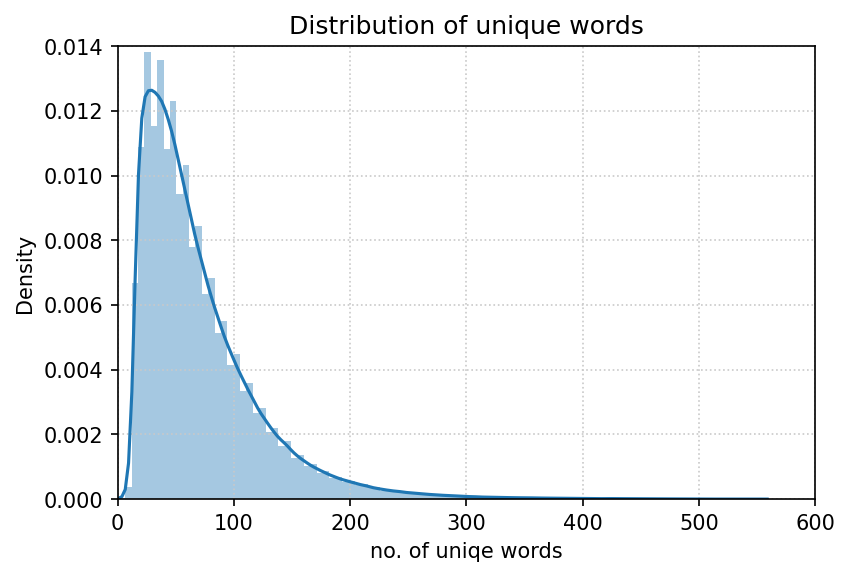

In [36]:
sns.distplot(df_rev['unique_words'], bins=100)
plt.title('Distribution of unique words')
plt.xlim(0, 600)
plt.ylim(0, 0.014)
plt.xlabel('no. of uniqe words')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

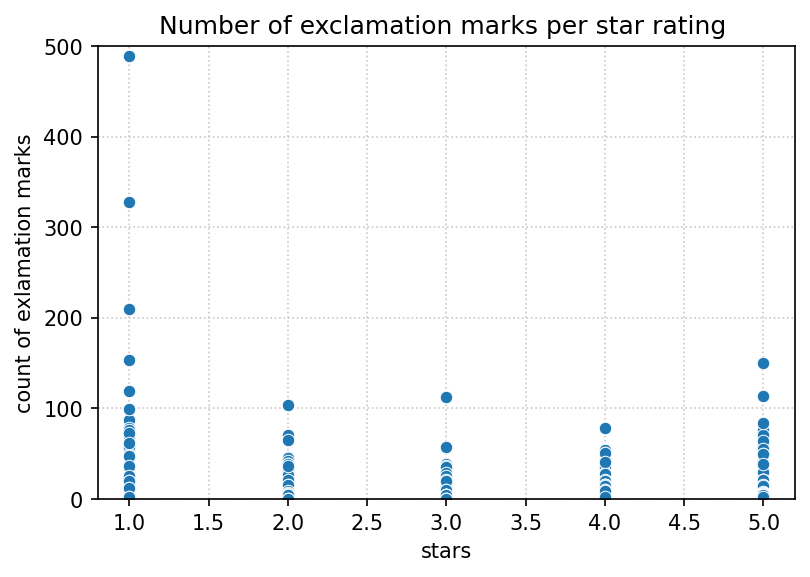

In [37]:
sns.scatterplot(data=df_rev, x='stars', y='count_excl', zorder=2)
plt.title('Number of exclamation marks per star rating ')
plt.ylim(0, 500)
plt.ylabel('count of exlamation marks')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

In [38]:
#df_rev[df_rev['count_excl'] > 450]
#df_rev['text'][156653]

In [39]:
df_corr_excl = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

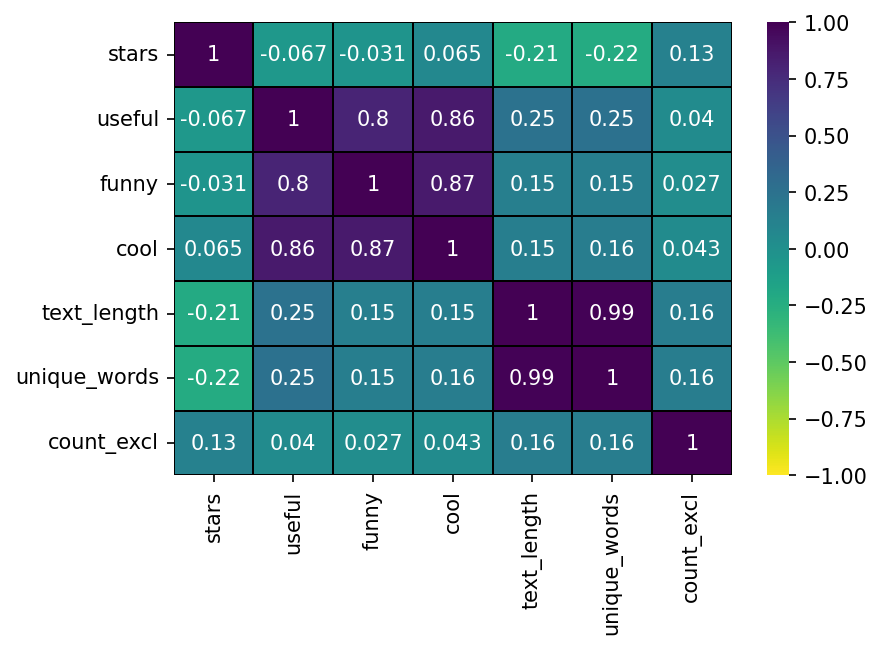

In [40]:
sns.heatmap(df_corr_excl.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

---
---

#### <u>***1. Conclusion:***<u>

***There is no correlation between how the reviews are rated and the length of the review, the given stars or excessive use of exclamation marks. Therefore usefulness should be based on the actual content of the review.***

---
---

### ***2. Language and spelling***

---
---

#### ***2.1 Language processing***

In [58]:
# Predict the language per review with a certainty of at least 95%
# Drop all other languages than english
# Return the corresponding dataframe

language_processing(df_rev);

In [61]:
# Cleaning in language_processing is not applied in place!

df_rev = df_rev[df_rev['language'] == 'English']

---

#### ***2.2 Create word clouds for useful, funny and cool***

In [65]:
df_use = df_rev[df_rev['useful'] != 0]
df_fun = df_rev[df_rev['funny'] != 0]
df_cool = df_rev[df_rev['cool'] != 0]

In [80]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

# create a wordcloud using all the text in text
text_use = " ".join(text for text in df_use['text'])
text_fun = " ".join(text for text in df_fun['text'])
text_cool = " ".join(text for text in df_cool['text'])

#remove the stopwords from the text
wordcloud_use = WordCloud(stopwords=stopwords).generate(text_use)
wordcloud_fun = WordCloud(stopwords=stopwords).generate(text_use)
wordcloud_cool = WordCloud(stopwords=stopwords).generate(text_use)

#### ***World Cloud for reviews rated as useful***

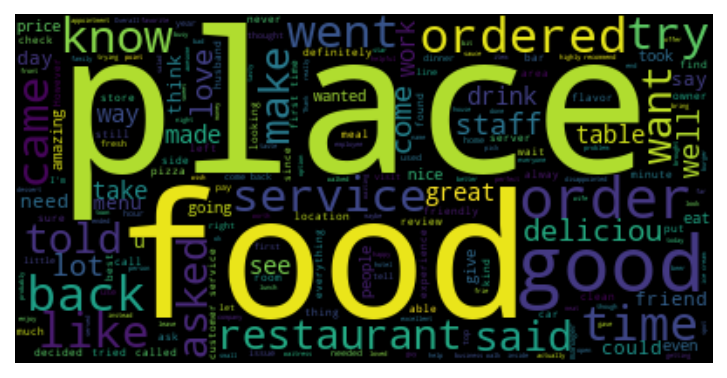

In [103]:
plt.imshow(wordcloud_use, interpolation='bilinear')
plt.axis("off");

#### ***World Cloud for reviews rated as funny***

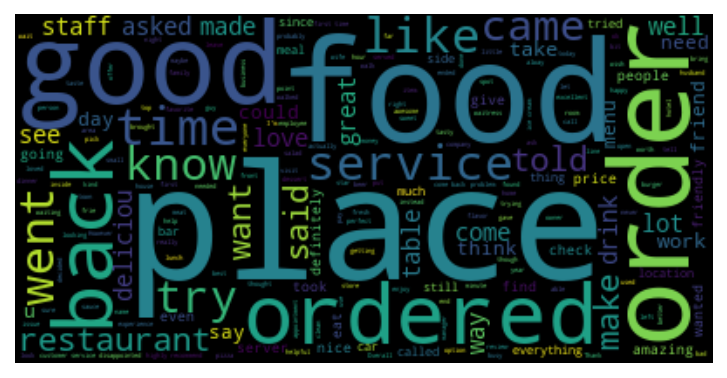

In [99]:
plt.imshow(wordcloud_fun, interpolation='bilinear')
plt.axis("off");

#### ***World Cloud for reviews rated as cool***

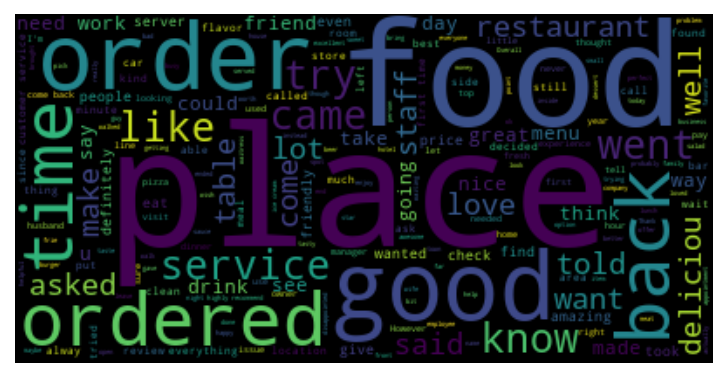

In [100]:
plt.imshow(wordcloud_cool, interpolation='bilinear')
plt.axis("off");
#print(wordcloud_cool.words_.keys())

---

#### ***2.3 Text cleaning and building N-grams for useful, funny and cool rated reviews***

In [181]:
# Basic text cleaning and Lemmatization

def text_cleaning(txt):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
    stopwords.extend(additional_stopwords)
    txt = (unicodedata.normalize('NFKD', txt)).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()
    words = re.sub(r'[^\w\s]', '', txt).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [114]:
# Apply the basic text cleaning and Lemmatization on each word list

words_use = text_cleaning(''.join(str(df_use['text'].tolist())))
words_fun = text_cleaning(''.join(str(df_fun['text'].tolist())))
words_cool = text_cleaning(''.join(str(df_cool['text'].tolist())))

In [115]:
# "Building" the N-grams of size 3 (Trigrams)
# CAREFUL THIS TAKES MORE THAN 4 HOURS

trigrams_use = (pd.Series(nltk.ngrams(words_use, 3)).value_counts())[:10]
trigrams_fun = (pd.Series(nltk.ngrams(words_fun, 3)).value_counts())[:10]
trigrams_cool = (pd.Series(nltk.ngrams(words_cool, 3)).value_counts())[:10]

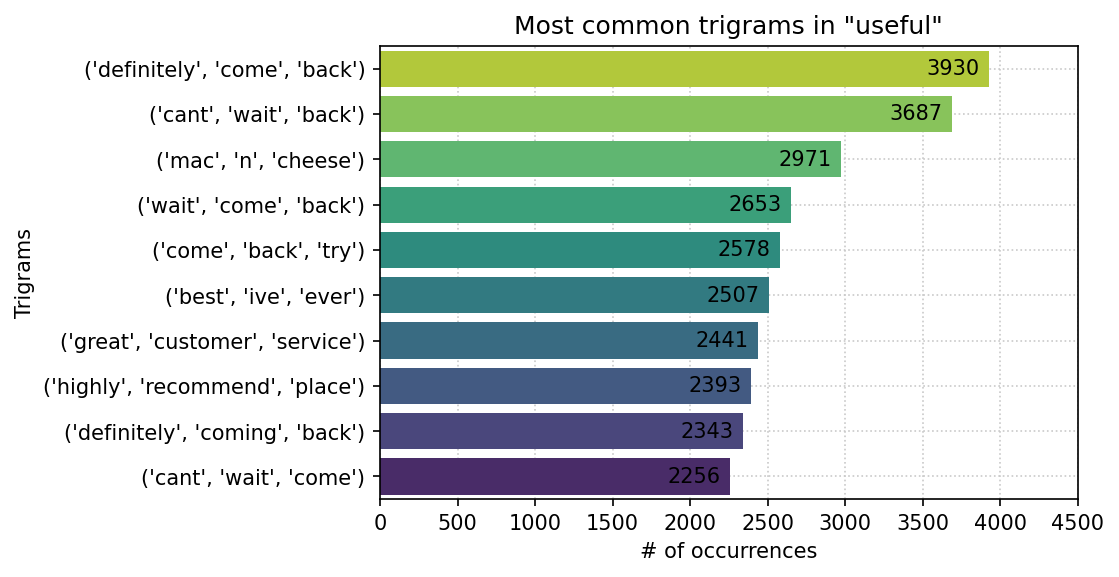

In [142]:
ax = sns.barplot(x=trigrams_use.values, y=trigrams_use.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "useful"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,4500)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

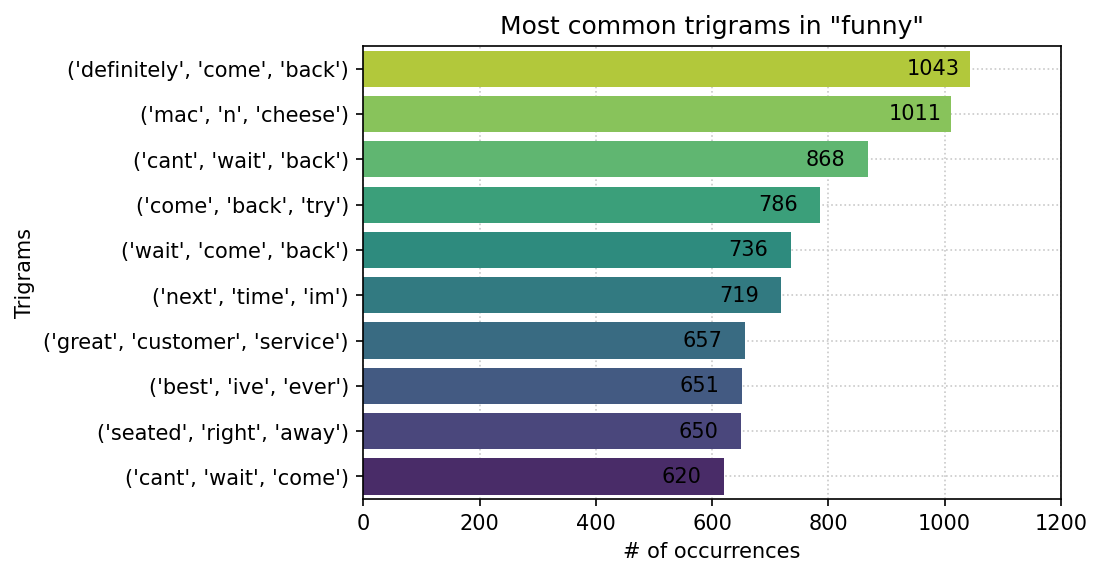

In [148]:
ax = sns.barplot(x=trigrams_fun.values, y=trigrams_fun.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "funny"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,1200)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

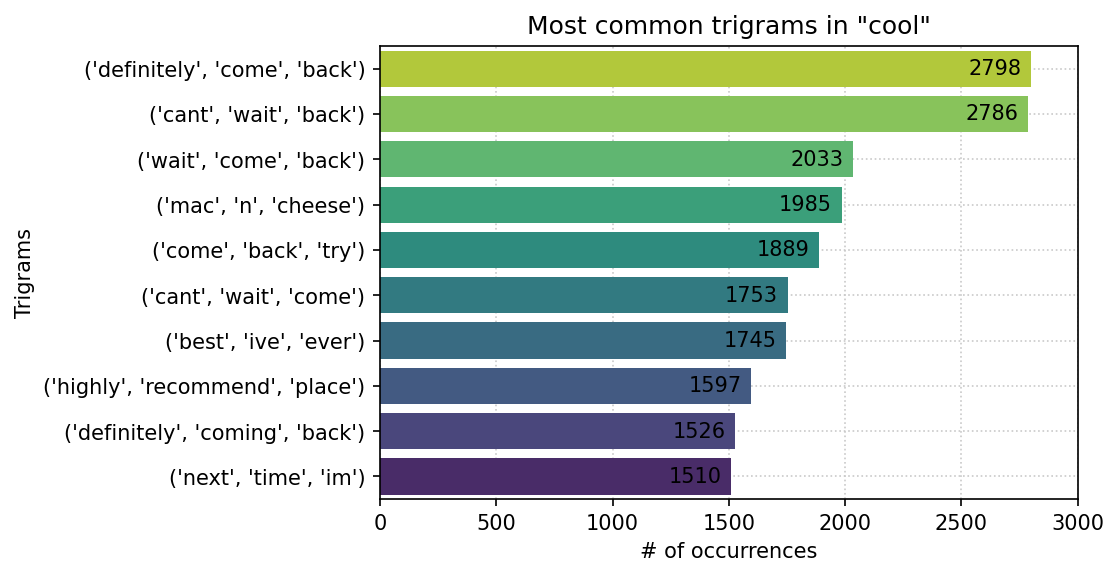

In [166]:
ax = sns.barplot(x=trigrams_cool.values, y=trigrams_cool.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "cool"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,3000)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

---

#### ***2.4 Create word clouds for reviews with star ratings ≤ 2***

In [176]:
df_bad = df_rev[df_rev['stars'] <= 2]

In [178]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

text_bad = " ".join(text for text in df_bad['text'])
wordcloud_bad = WordCloud(stopwords=stopwords).generate(text_bad)

#### ***Word Cloud for "bad" reviews***

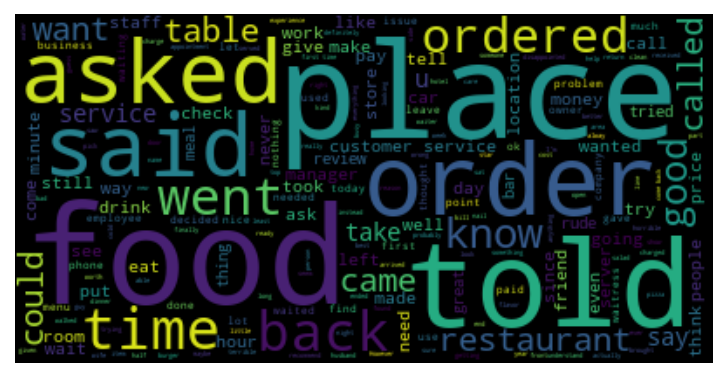

In [179]:
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off");

In [182]:
words_bad = text_cleaning(''.join(str(df_bad['text'].tolist())))

In [183]:
trigrams_bad = (pd.Series(nltk.ngrams(words_bad, 3)).value_counts())[:10]

KeyboardInterrupt: 